##Initialization


In [ ]:
from google.colab import userdata
tcg_key = userdata.get('POKEMON_TCG_KEY')

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer, MinMaxScaler, OneHotEncoder
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
# Mount to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Data Pulling

In [ ]:
import requests

url = "https://api.pokemontcg.io/v2/types"
headers = {
    "X-Api-Key": tcg_key
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    print(data)
else:
    print(f"Error: {response.status_code}")
    print(response.text)

{'data': ['Colorless', 'Darkness', 'Dragon', 'Fairy', 'Fighting', 'Fire', 'Grass', 'Lightning', 'Metal', 'Psychic', 'Water']}


In [ ]:
import requests
import json
import time

url = "https://api.pokemontcg.io/v2/cards"
headers = {
    "X-Api-Key": tcg_key
}

all_cards = []

# Get total count from first call
first_res = requests.get(url, headers=headers, params={'page': 1, 'page_size': 250})
first_res.raise_for_status()
first_cards = first_res.json()['data']
total_count = first_res.json()['totalCount']
total_pages = (total_count + 249) //250

print(f"Total Cards: {total_count}, Number of pages: {total_pages}")

all_cards.extend(first_cards)



Total Cards: 19688, Number of pages: 79


In [ ]:
# Loop through and fetch rest of the cards
for page in range(2, total_pages + 1):
  while True:
    response = requests.get(url, headers=headers, params={"page": page, "page_size": 250})

    if response.status_code == 200:
      cards = response.json()['data']
      all_cards.extend(cards)
      print(f"Page {page}/{total_pages} fetched, total {len(all_cards)}/{total_count}")
      break; # Succeeded in loading page
    elif response.status_code == 429: # rate limited
      print("Hit reate limit, sleeping 60s...")
      time.sleep(60)
    else:
      print(f"Error: {response.status_code}, retrying in 5s...")
      time.sleep(5)


# Save as JSON
with open("all_pokemon_cards_updated.json", "w", encoding="utf-8") as f:
  json.dump(all_cards, f, ensure_ascii=False, indent=4)

Page 2/79 fetched, total 500/19688
Page 3/79 fetched, total 750/19688
Page 4/79 fetched, total 1000/19688
Page 5/79 fetched, total 1250/19688
Error: 504, retrying in 5s...
Page 6/79 fetched, total 1500/19688
Page 7/79 fetched, total 1750/19688
Page 8/79 fetched, total 2000/19688
Error: 504, retrying in 5s...
Page 9/79 fetched, total 2250/19688
Page 10/79 fetched, total 2500/19688
Page 11/79 fetched, total 2750/19688
Error: 404, retrying in 5s...
Error: 404, retrying in 5s...
Page 12/79 fetched, total 3000/19688
Page 13/79 fetched, total 3250/19688
Page 14/79 fetched, total 3500/19688
Page 15/79 fetched, total 3750/19688
Error: 504, retrying in 5s...
Error: 504, retrying in 5s...
Error: 504, retrying in 5s...
Page 16/79 fetched, total 4000/19688
Page 17/79 fetched, total 4250/19688
Page 18/79 fetched, total 4500/19688
Page 19/79 fetched, total 4750/19688
Page 20/79 fetched, total 5000/19688
Page 21/79 fetched, total 5250/19688
Page 22/79 fetched, total 5500/19688
Page 23/79 fetched, tot

In [ ]:
import requests

url = "https://api.pokemontcg.io/v2/cards"
headers = {
    "X-Api-Key": tcg_key
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
  card = response.json()
  print(card)
else:
  print(f"Error: {response.status_code}" )
  print(response.text)

##Data Exploration

In [ ]:
import pandas as pd

path = "/content/drive/MyDrive/Capstone/all_pokemon_cards_updated.json"

df = pd.read_json(path)

df.head()

,id,name,supertype,subtypes,hp,types,evolvesFrom,attacks,weaknesses,resistances,...,legalities,images,tcgplayer,cardmarket,evolvesTo,level,abilities,rules,regulationMark,ancientTrait
0,hgss4-1,Aggron,Pokémon,[Stage 2],140.0,[Metal],Lairon,"[{'name': 'Second Strike', 'cost': ['Metal', '...","[{'type': 'Fire', 'value': '×2'}]","[{'type': 'Psychic', 'value': '-20'}]",...,{'unlimited': 'Legal'},{'small': 'https://images.pokemontcg.io/hgss4/...,{'url': 'https://prices.pokemontcg.io/tcgplaye...,{'url': 'https://prices.pokemontcg.io/cardmark...,NaN,NaN,NaN,NaN,NaN,NaN
1,xy5-1,Weedle,Pokémon,[Basic],50.0,[Grass],NaN,"[{'name': 'Multiply', 'cost': ['Grass'], 'conv...","[{'type': 'Fire', 'value': '×2'}]",NaN,...,"{'unlimited': 'Legal', 'expanded': 'Legal'}",{'small': 'https://images.pokemontcg.io/xy5/1....,{'url': 'https://prices.pokemontcg.io/tcgplaye...,{'url': 'https://prices.pokemontcg.io/cardmark...,[Kakuna],NaN,NaN,NaN,NaN,NaN
2,pl1-1,Ampharos,Pokémon,[Stage 2],130.0,[Lightning],Flaaffy,"[{'name': 'Gigavolt', 'cost': ['Lightning', 'C...","[{'type': 'Fighting', 'value': '+30'}]","[{'type': 'Metal', 'value': '-20'}]",...,{'unlimited': 'Legal'},{'small': 'https://images.pokemontcg.io/pl1/1....,{'url': 'https://prices.pokemontcg.io/tcgplaye...,{'url': 'https://prices.pokemontcg.io/cardmark...,NaN,57,"[{'name': 'Damage Bind', 'text': 'Each Pokémon...",NaN,NaN,NaN
3,dp3-1,Ampharos,Pokémon,[Stage 2],130.0,[Lightning],Flaaffy,"[{'name': 'Cluster Bolt', 'cost': ['Lightning'...","[{'type': 'Fighting', 'value': '+30'}]","[{'type': 'Metal', 'value': '-20'}]",...,{'unlimited': 'Legal'},{'small': 'https://images.pokemontcg.io/dp3/1....,{'url': 'https://prices.pokemontcg.io/tcgplaye...,{'url': 'https://prices.pokemontcg.io/cardmark...,NaN,52,"[{'name': 'Jamming', 'text': 'After your oppon...",NaN,NaN,NaN
4,det1-1,Bulbasaur,Pokémon,[Basic],60.0,[Grass],NaN,"[{'name': 'Find a Friend', 'cost': ['Grass'], ...","[{'type': 'Fire', 'value': '×2'}]",NaN,...,"{'unlimited': 'Legal', 'expanded': 'Legal'}",{'small': 'https://images.pokemontcg.io/det1/1...,{'url': 'https://prices.pokemontcg.io/tcgplaye...,{'url': 'https://prices.pokemontcg.io/cardmark...,[Ivysaur],NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['id', 'name', 'supertype', 'subtypes', 'hp', 'types', 'evolvesFrom',
       'attacks', 'weaknesses', 'resistances', 'retreatCost',
       'convertedRetreatCost', 'set', 'number', 'artist', 'rarity',
       'flavorText', 'nationalPokedexNumbers', 'legalities', 'images',
       'tcgplayer', 'cardmarket', 'evolvesTo', 'level', 'abilities', 'rules',
       'regulationMark', 'ancientTrait'],
      dtype='object')

In [ ]:
df.describe()

,hp,convertedRetreatCost
count,16685.00000,15747.000000
mean,108.13605,1.703880
std,63.61240,0.866124
min,10.00000,0.000000
25%,60.00000,1.000000
50%,90.00000,1.000000
75%,130.00000,2.000000
max,380.00000,5.000000


In [ ]:
df.count()

,0
id,19688
name,19688
supertype,19688
subtypes,19515
hp,16685
types,16656
evolvesFrom,7080
attacks,16660
weaknesses,16166
resistances,4749


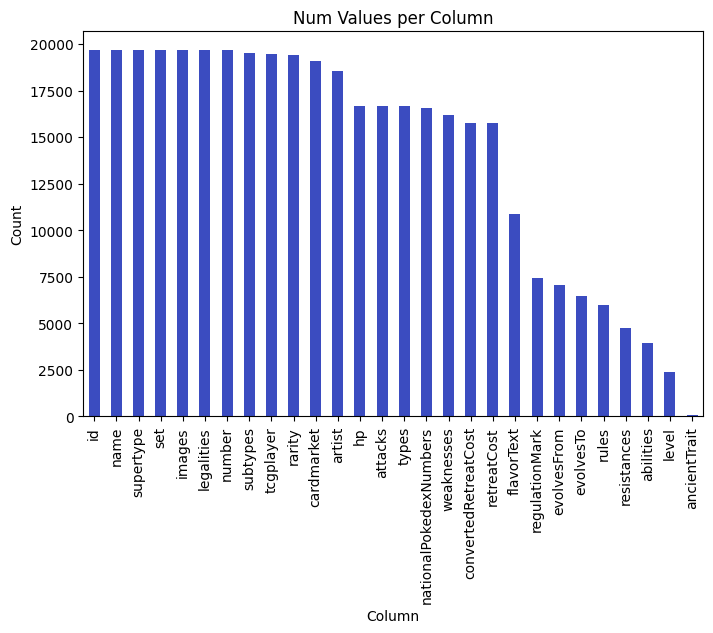

In [ ]:
# Create bar chart of values per column (aka non-Null vals)
df.count().sort_values(ascending=False).plot(kind='bar', figsize=(8,5), colormap="coolwarm")
plt.title("Num Values per Column")
plt.xlabel("Column")
plt.ylabel("Count")
plt.show()

In [ ]:
# df['cardmarket'].iloc[0]

df[df['cardmarket'].isnull()]['images'].iloc[478]


{'small': 'https://images.pokemontcg.io/me1/81.png',
 'large': 'https://images.pokemontcg.io/me1/81_hires.png'}

In [ ]:
df.loc[df['id'] == 'me1-182']

,id,name,supertype,subtypes,hp,types,evolvesFrom,attacks,weaknesses,resistances,...,legalities,images,tcgplayer,cardmarket,evolvesTo,level,abilities,rules,regulationMark,ancientTrait
19681,me1-182,Mega Kangaskhan ex,Pokémon,"[Basic, MEGA, ex]",300.0,[Colorless],NaN,"[{'name': 'Rapid-Fire Combo', 'cost': ['Colorl...","[{'type': 'Fighting', 'value': '×2'}]",NaN,...,"{'unlimited': 'Legal', 'standard': 'Legal', 'e...",{'small': 'https://images.pokemontcg.io/me1/18...,{'url': 'https://prices.pokemontcg.io/tcgplaye...,NaN,NaN,NaN,"[{'name': 'Run Errand', 'text': 'Once during y...",[Mega Evolution ex Rule: When your Mega Evolut...,I,NaN


In [ ]:
df[df['cardmarket'].isnull()]

,id,name,supertype,subtypes,hp,types,evolvesFrom,attacks,weaknesses,resistances,...,legalities,images,tcgplayer,cardmarket,evolvesTo,level,abilities,rules,regulationMark,ancientTrait
112,dpp-DP01,Turtwig,Pokémon,[Basic],60.0,[Grass],NaN,"[{'name': 'Tackle', 'cost': [], 'convertedEner...","[{'type': 'Fire', 'value': '+10'}]","[{'type': 'Water', 'value': '-20'}]",...,{'unlimited': 'Legal'},{'small': 'https://images.pokemontcg.io/dpp/DP...,{'url': 'https://prices.pokemontcg.io/tcgplaye...,NaN,[Grotle],10,NaN,NaN,NaN,NaN
137,dpp-DP02,Chimchar,Pokémon,[Basic],50.0,[Fire],NaN,"[{'name': 'Scratch', 'cost': [], 'convertedEne...","[{'type': 'Water', 'value': '+10'}]",NaN,...,{'unlimited': 'Legal'},{'small': 'https://images.pokemontcg.io/dpp/DP...,{'url': 'https://prices.pokemontcg.io/tcgplaye...,NaN,[Monferno],8,NaN,NaN,NaN,NaN
232,dpp-DP03,Piplup,Pokémon,[Basic],60.0,[Water],NaN,"[{'name': 'Peck', 'cost': [], 'convertedEnergy...","[{'type': 'Lightning', 'value': '+10'}]",NaN,...,{'unlimited': 'Legal'},{'small': 'https://images.pokemontcg.io/dpp/DP...,{'url': 'https://prices.pokemontcg.io/tcgplaye...,NaN,[Prinplup],9,NaN,NaN,NaN,NaN
242,dpp-DP04,Pachirisu,Pokémon,[Basic],70.0,[Lightning],NaN,"[{'name': 'Minor Errand-Running', 'cost': ['Co...","[{'type': 'Fighting', 'value': '+20'}]","[{'type': 'Metal', 'value': '-20'}]",...,{'unlimited': 'Legal'},{'small': 'https://images.pokemontcg.io/dpp/DP...,{'url': 'https://prices.pokemontcg.io/tcgplaye...,NaN,NaN,23,NaN,NaN,NaN,NaN
341,dpp-DP05,Tropical Wind,Trainer,[Item],NaN,NaN,NaN,NaN,NaN,NaN,...,{'unlimited': 'Legal'},{'small': 'https://images.pokemontcg.io/dpp/DP...,{'url': 'https://prices.pokemontcg.io/tcgplaye...,NaN,NaN,NaN,NaN,"[Flip a coin. If heads, remove 2 damage counte...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19683,me1-184,Lillie's Determination,Trainer,[Supporter],NaN,NaN,NaN,NaN,NaN,NaN,...,"{'unlimited': 'Legal', 'standard': 'Legal', 'e...",{'small': 'https://images.pokemontcg.io/me1/18...,{'url': 'https://prices.pokemontcg.io/tcgplaye...,NaN,NaN,NaN,NaN,"[Shuffle your hand into your deck. Then, draw ...",I,NaN
19684,me1-185,Lt. Surge's Bargain,Trainer,[Supporter],NaN,NaN,NaN,NaN,NaN,NaN,...,"{'unlimited': 'Legal', 'standard': 'Legal', 'e...",{'small': 'https://images.pokemontcg.io/me1/18...,{'url': 'https://prices.pokemontcg.io/tcgplaye...,NaN,NaN,NaN,NaN,[Ask your opponent if each player may take a P...,I,NaN
19685,me1-186,Wally's Compassion,Trainer,[Supporter],NaN,NaN,NaN,NaN,NaN,NaN,...,"{'unlimited': 'Legal', 'standard': 'Legal', 'e...",{'small': 'https://images.pokemontcg.io/me1/18...,{'url': 'https://prices.pokemontcg.io/tcgplaye...,NaN,NaN,NaN,NaN,[Heal all damage from 1 of your Mega Evolution...,I,NaN
19686,me1-187,Mega Gardevoir ex,Pokémon,"[Stage 2, MEGA, ex]",360.0,[Psychic],Kirlia,"[{'name': 'Overflowing Wishes', 'cost': ['Psyc...","[{'type': 'Darkness', 'value': '×2'}]","[{'type': 'Fighting', 'value': '-30'}]",...,"{'unlimited': 'Legal', 'standard': 'Legal', 'e...",{'small': 'https://images.pokemontcg.io/me1/18...,{'url': 'https://prices.pokemontcg.io/tcgplaye...,NaN,NaN,NaN,NaN,[Mega Evolution ex Rule: When your Mega Evolut...,I,NaN


In [ ]:
# Pull info for a single set (Mega Evolutions 1)
df[df['set'].str['id'] == "me1"].count()

,0
id,188
name,188
supertype,188
subtypes,188
hp,152
types,152
evolvesFrom,69
attacks,152
weaknesses,148
resistances,33


In [ ]:
df['set_id'] = df['set'].str['id']

In [ ]:
df['series'] = df['set'].str['series']

In [ ]:
df['set_release_date']= df['set'].str['releaseDate']

In [ ]:
grouped_by_set = df.groupby("set_id")

In [ ]:
# Organize data to get the promo counts per set
promo_counts = df[df['rarity']=="Promo"].groupby(["series"]).size()
promo_counts = promo_counts.reset_index( name="count")

release_dates = df.groupby("series")['set_release_date'].min().reset_index()

promo_counts = promo_counts.merge(release_dates, on="series")

promo_counts = promo_counts.sort_values("set_release_date")
print(promo_counts)

                   series  count set_release_date
0                    Base     53       1999/01/09
5                   Other      9       2001/07/31
4                      NP     40       2003/10/01
2         Diamond & Pearl     56       2007/05/01
3  HeartGold & SoulSilver     25       2010/02/10
1           Black & White    101       2011/03/01
9                      XY    216       2013/10/12
7              Sun & Moon    251       2017/02/03
8          Sword & Shield    304       2019/11/15
6        Scarlet & Violet    200       2022/11/01


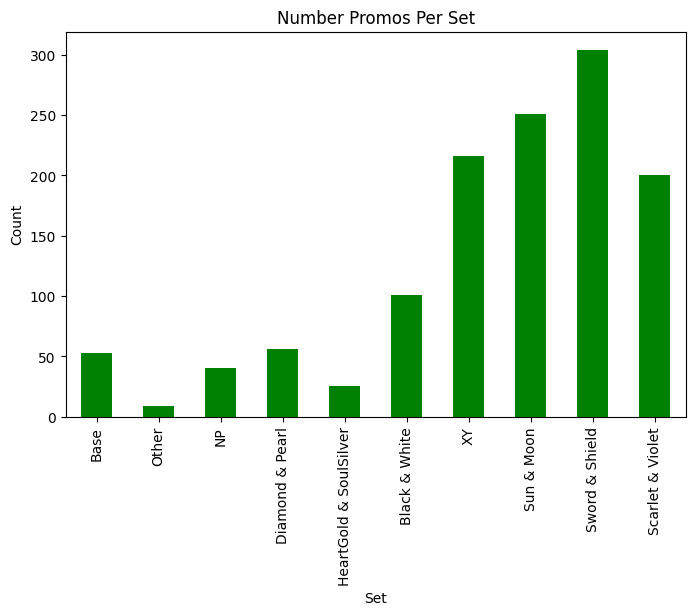

In [ ]:
# Promo per counts set
promo_counts.plot(x="series", y="count", kind='bar', figsize=(8,5), legend=False, color="green")
plt.title("Number Promos Per Set")
plt.xlabel("Set")
plt.ylabel("Count")
plt.show()

## Data Cleansing

In [ ]:
# Drop unneeded columns
# flat_df = pd.json_normalize(df.to_dict(orient='records'), sep="_")

df = df.drop(columns=["evolvesFrom", "evolvesTo", "retreatCost", "artist", "flavorText", "legalities", "cardmarket", "level", "subtypes"])


# flat_df.head()

KeyError: "['evolvesFrom', 'evolvesTo', 'retreatCost', 'artist', 'flavorText', 'legalities', 'cardmarket', 'level', 'subtypes'] not found in axis"

In [ ]:
# Add columns for special rules or abilities
df['has_rule'] = df['rules'].notnull().astype(int)

df['has_ability'] = df['abilities'].notnull().astype(int)

df['has_ancient_trait'] = df['ancientTrait'].notnull().astype(int)

df['is_regulation'] = df['regulationMark'].notnull().astype(int)

# Drop unnecessary columns
df = df.drop(columns=['abilities', 'ancientTrait', 'rules', 'regulationMark'])

In [ ]:
# Include resistances and weaknesses (how many)
df['weakness_count'] = df['weaknesses'].apply(lambda x: len(x) if isinstance(x, list) else 0)
df['resistances_count'] = df['resistances'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Drop cols
df = df.drop(columns=['weaknesses', 'resistances'])

In [ ]:
df[df['resistances_count'] > 1]['set'].str['series']

,set
24,EX
68,EX
150,EX
466,EX
524,EX
645,EX
820,EX
838,EX
851,EX
929,EX


In [ ]:
# Create number of attacks col
df['num_attacks'] = df['attacks'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Drop attacks col
df = df.drop(columns=['attacks'])

In [ ]:
# Handle current nulls
df['convertedRetreatCost'] = df['convertedRetreatCost'].fillna(0)
df['hp'] = df['hp'].fillna(0)

In [ ]:
# One hot Encoding on pokemon types
df['types'] = df['types'].apply(lambda x: x if isinstance(x, list) else [])

# Use binarizer
mlb = MultiLabelBinarizer()
types_encoded = mlb.fit_transform(df['types'])

# Create a new DataFrame with the encoded values
types_df = pd.DataFrame(types_encoded, columns=mlb.classes_)

# Add to original dataframe
df = pd.concat([df, types_df], axis = 1)

# Drop the original column
df = df.drop(columns=['types'])

print(mlb.classes_)

['Colorless' 'Darkness' 'Dragon' 'Fairy' 'Fighting' 'Fire' 'Grass'
 'Lightning' 'Metal' 'Psychic' 'Water']


In [ ]:
# Encode different pokemon card types
pd.get_dummies(df, columns=['supertype'], dtype=int)
df = df.drop(columns=['supertype'])

In [ ]:
invalid_mask = ~df['number'].astype(str).str.isnumeric()
invalid_values = df.loc[invalid_mask, 'number']
print(invalid_values)

11            H1
21            H2
59            H3
112         DP01
137         DP02
          ...   
16420    SWSH284
16421    SWSH289
16422    SWSH290
16423    SWSH303
16424    SWSH304
Name: number, Length: 1621, dtype: object


In [ ]:
# Check if all weirdly numbered rarities are promos
promo_rows = (df.loc[invalid_mask, 'rarity'] != 'Promo')
print(promo_rows)


11        True
21        True
59        True
112      False
137      False
         ...  
16420    False
16421    False
16422    False
16423    False
16424    False
Name: rarity, Length: 1621, dtype: bool


In [ ]:
df.iloc[invalid_values.index]

,id,name,hp,convertedRetreatCost,set,number,rarity,nationalPokedexNumbers,images,tcgplayer,...,Darkness,Dragon,Fairy,Fighting,Fire,Grass,Lightning,Metal,Psychic,Water
11,ecard2-H1,Ampharos,100.0,2.0,"{'id': 'ecard2', 'name': 'Aquapolis', 'series'...",H1,Rare Holo,[181],{'small': 'https://images.pokemontcg.io/ecard2...,NaN,...,0,0,0,0,0,0,1,0,0,0
21,ecard2-H2,Arcanine,90.0,3.0,"{'id': 'ecard2', 'name': 'Aquapolis', 'series'...",H2,Rare Holo,[59],{'small': 'https://images.pokemontcg.io/ecard2...,NaN,...,0,0,0,0,1,0,0,0,0,0
59,ecard2-H3,Ariados,70.0,0.0,"{'id': 'ecard2', 'name': 'Aquapolis', 'series'...",H3,Rare Holo,[168],{'small': 'https://images.pokemontcg.io/ecard2...,NaN,...,0,0,0,0,0,1,0,0,0,0
112,dpp-DP01,Turtwig,60.0,2.0,"{'id': 'dpp', 'name': 'DP Black Star Promos', ...",DP01,Promo,[387],{'small': 'https://images.pokemontcg.io/dpp/DP...,{'url': 'https://prices.pokemontcg.io/tcgplaye...,...,0,0,0,0,0,1,0,0,0,0
137,dpp-DP02,Chimchar,50.0,1.0,"{'id': 'dpp', 'name': 'DP Black Star Promos', ...",DP02,Promo,[390],{'small': 'https://images.pokemontcg.io/dpp/DP...,{'url': 'https://prices.pokemontcg.io/tcgplaye...,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16420,swshp-SWSH284,Galarian Moltres,120.0,2.0,"{'id': 'swshp', 'name': 'SWSH Black Star Promo...",SWSH284,Promo,[146],{'small': 'https://images.pokemontcg.io/swshp/...,{'url': 'https://prices.pokemontcg.io/tcgplaye...,...,1,0,0,0,0,0,0,0,0,0
16421,swshp-SWSH289,Morpeko V-UNION,310.0,2.0,"{'id': 'swshp', 'name': 'SWSH Black Star Promo...",SWSH289,Promo,[877],{'small': 'https://images.pokemontcg.io/swshp/...,{'url': 'https://prices.pokemontcg.io/tcgplaye...,...,0,0,0,0,0,0,1,0,0,0
16422,swshp-SWSH290,Morpeko V-UNION,310.0,2.0,"{'id': 'swshp', 'name': 'SWSH Black Star Promo...",SWSH290,Promo,[877],{'small': 'https://images.pokemontcg.io/swshp/...,{'url': 'https://prices.pokemontcg.io/tcgplaye...,...,0,0,0,0,0,0,1,0,0,0
16423,swshp-SWSH303,Bulbasaur,70.0,2.0,"{'id': 'swshp', 'name': 'SWSH Black Star Promo...",SWSH303,Promo,[1],{'small': 'https://images.pokemontcg.io/swshp/...,{'url': 'https://prices.pokemontcg.io/tcgplaye...,...,0,0,0,0,0,1,0,0,0,0


Found that most reasons why these cards were not "numbers" is because they were numbered with the set in front or weirdly for different side sets.

Note:


*   Front is the set
*   Back letters "a, b..." are considered alt arts or one series (Sun and Moon)
*   HGSS has alph lithographs that need manually numbered
*   Unowns need to be manually numbered as well






In [ ]:
df['number'] = df['number'].astype(str).str.replace(r'^\D+|\D+$', '', regex=True)

In [ ]:
# Manual number conversions
df.at[10562, 'number'] = 124
df.at[9232, 'number'] = 96
df.at[8938, 'number'] = 91
df.at[10042, 'number'] = 103

# create labels for the rest
unown_labels = list(range(3,29)) + [1, 2]

# Pull out unowns cards
unowns = df.loc[(df['name'] == 'Unown' ) & (df['id'].str.startswith('ex10-'))]

# Add in labels
unowns['label'] = unown_labels

print(unowns)

# Merge back into original df
df.loc[(df['name'] == 'Unown' ) & (df['id'].str.startswith('ex10-')), 'number'] = unowns['label'].values


           id   name    hp  convertedRetreatCost  \
10763  ex10-A  Unown  60.0                   1.0   
10829  ex10-B  Unown  60.0                   1.0   
10884  ex10-C  Unown  60.0                   1.0   
10913  ex10-D  Unown  60.0                   1.0   
10975  ex10-E  Unown  60.0                   1.0   
11025  ex10-F  Unown  60.0                   1.0   
11066  ex10-G  Unown  60.0                   1.0   
11132  ex10-H  Unown  60.0                   1.0   
11184  ex10-I  Unown  60.0                   1.0   
11234  ex10-J  Unown  60.0                   1.0   
11258  ex10-K  Unown  60.0                   1.0   
11293  ex10-L  Unown  60.0                   1.0   
11336  ex10-M  Unown  60.0                   1.0   
11374  ex10-N  Unown  60.0                   1.0   
11397  ex10-O  Unown  60.0                   1.0   
11424  ex10-P  Unown  60.0                   1.0   
11449  ex10-Q  Unown  60.0                   1.0   
11485  ex10-R  Unown  60.0                   1.0   
11519  ex10-

/tmp/ipython-input-2888292678.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unowns['label'] = unown_labels


In [ ]:
# Convert number to int
df['number'] = df['number'].astype(int)

In [ ]:
# Fill national dex missing values with 0
df['nationalPokedexNumbers'] = df['nationalPokedexNumbers'].fillna(0)

# Take the mean for tag team cards (cards w/ two pokemon)
df['nationalPokedexNumbers'] = df['nationalPokedexNumbers'].apply(lambda x: np.mean(x) if isinstance(x, list) else x)

# Convert national dex to numbers
df['nationalPokedexNumbers'] = df['nationalPokedexNumbers'].astype(int)

In [ ]:
# Date to reference
date = pd.Timestamp("2025-10-31") # Spooky!

# Pull out set date
df['releaseDate'] = df["set"].str['releaseDate']

# Set release date as datetime datatype
df['releaseDate'] = pd.to_datetime(df['releaseDate'])

# create age column in years
df['set_age'] = (date - df['releaseDate']).dt.days / 365

# Drop the set
df = df.drop(columns=['set', 'releaseDate'])

In [ ]:
# Map of all the rarities
rarity_map = {
	'Common': 'Common',
  'Uncommon': 'Uncommon',

  'Rare': 'Rare',
	'Rare Holo': 'Rare',

	'Ultra Rare': 'Ultra Rare',
	'Rare Ultra': 'Ultra Rare',
	'Double Rare': 'Ultra Rare',
	'Rare Holo EX': 'Ultra Rare',
  'Rare Holo Star': 'Ultra Rare',
	'Rare Holo LV.X': 'Ultra Rare',
	'LEGEND': 'Ultra Rare',
	'Rare Prime': 'Ultra Rare',
	'ACE SPEC Rare': 'Ultra Rare',
	'Rare ACE': 'Ultra Rare',
	'Rare BREAK': 'Ultra Rare',
	'Rare Holo GX': 'Ultra Rare',
	'Rare Holo V': 'Ultra Rare',
  'Rare Holo VMAX': 'Ultra Rare',
  'Rare Holo VSTAR': 'Ultra Rare',
	'Amazing Rare': 'Ultra Rare',
	'Radiant Rare': 'Ultra Rare',

	'Rare Secret': 'Secret Rare',
	'Rare Rainbow': 'Secret Rare',
	'Illustration Rare': 'Secret Rare',
	'Special Illustration Rare': 'Secret Rare',
	'Shiny Ultra Rare': 'Secret Rare',
	'Rare Shiny GX': 'Secret Rare',
	'Rare Shiny': 'Secret Rare',
  'Shiny Rare': 'Secret Rare',
	'Trainer Gallery Rare Holo': 'Secret Rare',

	'Hyper Rare': 'Hyper Rare',
  'Mega Hyper Rare': 'Hyper Rare',
	'Black White Rare': 'Hyper Rare',

	'Promo': 'Fixed Rarity',
	'Classic Collection': 'Fixed Rarity',
}

In [ ]:
# Create a numeric rarity map
rarity_numeric_map = {
    'Common': 1,
    'Uncommon': 2,
    'Rare': 3,
    'Ultra Rare': 4,
    'Secret Rare': 5,
    'Hyper Rare': 6,
    'Fixed Rarity': 3.5,
}

In [ ]:
# Create promo flag
df['is_promo'] = df['rarity'].apply(lambda x: 1 if x == 'Promo' else 0)

In [ ]:
# Perform mapping
df['rarity'] = df['rarity'].map(rarity_map)
df['rarity_score'] = df['rarity'].map(rarity_numeric_map)

# Handle nulls
df['rarity_score'] = df['rarity_score'].fillna(0)

# Drop rarity
df = df.drop(columns=['rarity'])

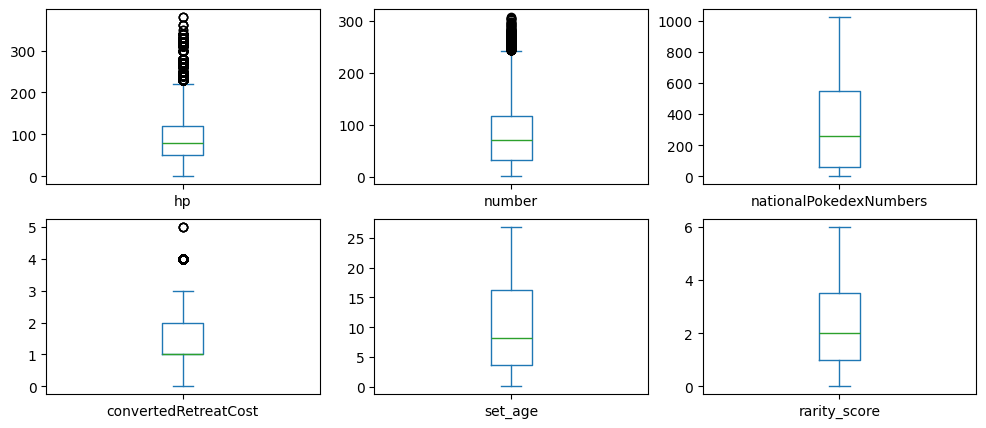

In [ ]:
# Plot the big numerical columns
cols = ['hp', 'number', 'nationalPokedexNumbers', 'convertedRetreatCost', 'set_age', 'rarity_score']

df[cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(12,5), sharey=False)
plt.show()

There are outliers for the hp and number, but I don't think this necessarily hurts anything. For the number it just means that earlier sets aren't nearly as big as the more recent sets.

Also, for hp, it makes sense that some valuesto have higher hp values, especially as Pokemon has to introduce newer, bigger cards.

All of these show me that I should balance with the MinMaxScaler for the most part since a lot of my other datapoints are flags.

In [ ]:
# Perform scaler on large data points
scaler = MinMaxScaler()
df[cols] = scaler.fit_transform(df[cols])

In [ ]:
# Definition to pull out the price information we want for predictions
def extract_price(data):
  # Skip NaN
  if not isinstance(data, dict):
    return None

  # Pull out the different varients of prices
  prices = data.get("prices", {})

  # empty or doesn't exist
  if not isinstance(prices, dict) or not prices:
    return None

  # We only want these versions, if availaible
  best_order = ["normal", "holofoil", "unlimited", "unlimitedHolofoil"]

  # Find whats there
  #has_valid_key = [k for k in prices.keys() if k in valid_keys]

  key_found = False
  for key in best_order:
    if key in prices:
      key_found = True
      return prices[key].get("market")

  if key_found == False:
    first_key = next(iter(prices))
    return prices[first_key].get("market")

In [ ]:
# Extract the market price
df['marketPrice'] = df['tcgplayer'].apply(extract_price)


In [ ]:
df[df['marketPrice'].isnull()]

,id,name,hp,convertedRetreatCost,number,nationalPokedexNumbers,images,tcgplayer,has_rule,has_ability,...,Fire,Grass,Lightning,Metal,Psychic,Water,set_age,is_promo,rarity_score,marketPrice
11,ecard2-H1,Ampharos,0.263158,0.4,0.000000,0.176585,{'small': 'https://images.pokemontcg.io/ecard2...,NaN,0,0,...,0,0,1,0,0,0,0.849646,0,0.500000,NaN
21,ecard2-H2,Arcanine,0.236842,0.6,0.003268,0.057561,{'small': 'https://images.pokemontcg.io/ecard2...,NaN,0,1,...,1,0,0,0,0,0,0.849646,0,0.500000,NaN
59,ecard2-H3,Ariados,0.184211,0.0,0.006536,0.163902,{'small': 'https://images.pokemontcg.io/ecard2...,NaN,0,1,...,0,1,0,0,0,0,0.849646,0,0.500000,NaN
114,basep-1,Pikachu,0.157895,0.2,0.000000,0.024390,{'small': 'https://images.pokemontcg.io/basep/...,{'url': 'https://prices.pokemontcg.io/tcgplaye...,0,0,...,0,0,1,0,0,0,0.982269,1,0.583333,NaN
148,ecard2-H4,Azumarill,0.184211,0.2,0.009804,0.179512,{'small': 'https://images.pokemontcg.io/ecard2...,NaN,0,1,...,0,0,0,0,0,1,0.849646,0,0.500000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19148,svp-199,Zarude,0.315789,0.4,0.647059,0.871220,{'small': 'https://images.pokemontcg.io/svp/19...,NaN,0,0,...,0,1,0,0,0,0,0.108640,1,0.583333,NaN
19149,svp-200,Eevee,0.157895,0.2,0.650327,0.129756,{'small': 'https://images.pokemontcg.io/svp/20...,NaN,0,0,...,0,0,0,0,0,0,0.108640,1,0.583333,NaN
19150,svp-201,Zebstrika,0.315789,0.2,0.653595,0.510244,{'small': 'https://images.pokemontcg.io/svp/20...,NaN,0,0,...,0,0,1,0,0,0,0.108640,1,0.583333,NaN
19151,svp-202,Kangaskhan,0.342105,0.4,0.656863,0.112195,{'small': 'https://images.pokemontcg.io/svp/20...,NaN,0,0,...,0,0,0,0,0,0,0.108640,1,0.583333,NaN


In [ ]:
# Drop the remaining columns without a market price
df = df.dropna(subset=['marketPrice'])

# Drop tcgplayer column
df = df.drop(columns=['tcgplayer'])

In [ ]:
df = df.drop(columns= ['releaseDate'])

KeyError: "['releaseDate'] not found in axis"

In [ ]:
df.dtypes

,0
id,object
name,object
hp,float64
convertedRetreatCost,float64
number,float64
nationalPokedexNumbers,float64
images,object
has_rule,int64
has_ability,int64
has_ancient_trait,int64


In [ ]:
df.head()

,id,name,hp,convertedRetreatCost,number,nationalPokedexNumbers,images,has_rule,has_ability,has_ancient_trait,...,Fire,Grass,Lightning,Metal,Psychic,Water,set_age,is_promo,rarity_score,marketPrice
0,hgss4-1,Aggron,0.368421,0.8,0.0,0.298537,{'small': 'https://images.pokemontcg.io/hgss4/...,0,0,0,...,0,0,0,1,0,0,0.557651,0,0.500000,3.21
1,xy5-1,Weedle,0.131579,0.2,0.0,0.012683,{'small': 'https://images.pokemontcg.io/xy5/1....,0,0,0,...,0,1,0,0,0,0,0.398381,0,0.166667,0.12
2,pl1-1,Ampharos,0.342105,0.4,0.0,0.176585,{'small': 'https://images.pokemontcg.io/pl1/1....,0,1,0,...,0,0,1,0,0,0,0.622220,0,0.500000,14.81
3,dp3-1,Ampharos,0.342105,0.6,0.0,0.176585,{'small': 'https://images.pokemontcg.io/dp3/1....,0,1,0,...,0,0,1,0,0,0,0.670186,0,0.500000,19.65
4,det1-1,Bulbasaur,0.157895,0.2,0.0,0.000976,{'small': 'https://images.pokemontcg.io/det1/1...,0,0,0,...,0,1,0,0,0,0,0.242493,0,0.166667,0.60


## Pull out Image information

In [ ]:
# Copy important info
images_df = df[['id', 'name', 'images']].copy()
df = df.drop(columns='images')

In [ ]:
# Pull out small image links
images_df['images'] = images_df['images'].str['small']
images_df.head()

,id,name,images
0,hgss4-1,Aggron,https://images.pokemontcg.io/hgss4/1.png
1,xy5-1,Weedle,https://images.pokemontcg.io/xy5/1.png
2,pl1-1,Ampharos,https://images.pokemontcg.io/pl1/1.png
3,dp3-1,Ampharos,https://images.pokemontcg.io/dp3/1.png
4,det1-1,Bulbasaur,https://images.pokemontcg.io/det1/1.png


In [ ]:
images_df.rename(columns={'images': 'image_url'}, inplace=True)

In [ ]:
# Check for nulls
images_df[images_df['image_url'].isnull()]

,id,name,image_url


# Final Evaluations/Checks

In [ ]:
df.count()

,0
id,19382
name,19382
hp,19382
convertedRetreatCost,19382
number,19382
nationalPokedexNumbers,19382
has_rule,19382
has_ability,19382
has_ancient_trait,19382
is_regulation,19382


In [ ]:
df.isnull().values.any()

np.False_

We quickly check and see that all are accounted for and have values. Earlier, we also saw that the columns are all the correct data types of either ints or floats.

Also, we see that there are no more null values and we have covered them all. This dataset is now considered cleaned.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
hp,19382.0,0.242424,0.185073,0.00,0.131579,0.210526,0.315789,1.00
convertedRetreatCost,19382.0,0.273842,0.206404,0.00,0.200000,0.200000,0.400000,1.00
number,19382.0,0.263403,0.198140,0.00,0.101307,0.225490,0.375817,1.00
nationalPokedexNumbers,19382.0,0.321653,0.285186,0.00,0.059512,0.251707,0.538537,1.00
has_rule,19382.0,0.303684,0.459860,0.00,0.000000,0.000000,1.000000,1.00
has_ability,19382.0,0.200031,0.400034,0.00,0.000000,0.000000,0.000000,1.00
has_ancient_trait,19382.0,0.003044,0.055090,0.00,0.000000,0.000000,0.000000,1.00
is_regulation,19382.0,0.382571,0.486027,0.00,0.000000,0.000000,1.000000,1.00
weakness_count,19382.0,0.825766,0.384186,0.00,1.000000,1.000000,1.000000,2.00
resistances_count,19382.0,0.244815,0.436302,0.00,0.000000,0.000000,0.000000,2.00


In [ ]:
critical_cols = df['hp'].describe()


In [ ]:
threshold = df['marketPrice'].quantile(0.99)
outliers = df[df['marketPrice'] > threshold]
print(outliers[['id', 'name', 'marketPrice']].sort_values(by='marketPrice', ascending=False))

df_no_outliers = df[df['marketPrice'] <= threshold]

                  id                      name  marketPrice
10289       neo4-107         Shining Charizard      6502.49
12155        sm9-170        Latias & Latios-GX      2617.85
13901      swsh7-215              Umbreon VMAX      2240.56
9854        ex13-104                 Pikachu ★      2032.83
10224       ex16-102                Vaporeon ★      1999.99
...              ...                       ...          ...
12423        sm9-186       Gengar & Mimikyu-GX       263.24
11110        bw6-123               Rayquaza-EX       263.14
9222          xy7-96          Primal Kyogre-EX       262.15
1151         neo4-14           Light Dragonite       261.56
7717   swshp-SWSH074  Special Delivery Pikachu       258.92

[194 rows x 3 columns]


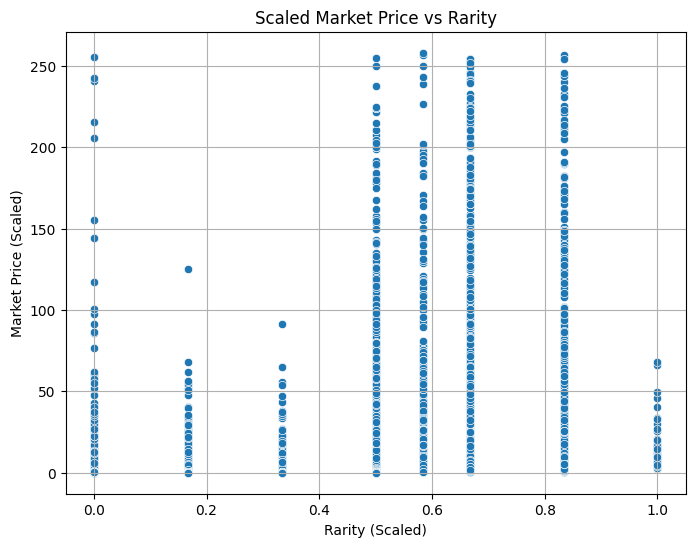

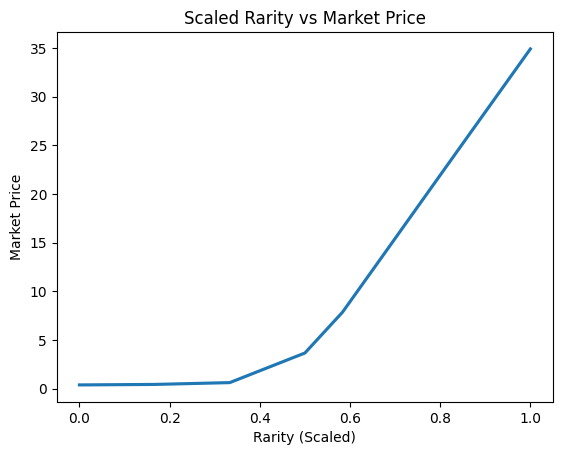

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_no_outliers, x='rarity_score', y='marketPrice')

plt.title('Scaled Market Price vs Rarity')
plt.xlabel('Rarity (Scaled)')
plt.ylabel('Market Price (Scaled)')
plt.grid(True)
plt.show()

sns.regplot(data=df_no_outliers, x='rarity_score', y='marketPrice', lowess=True,  scatter_kws={'alpha': 0.5}, scatter=False)
plt.title('Scaled Rarity vs Market Price')
plt.xlabel('Rarity (Scaled)')
plt.ylabel('Market Price')
plt.show()

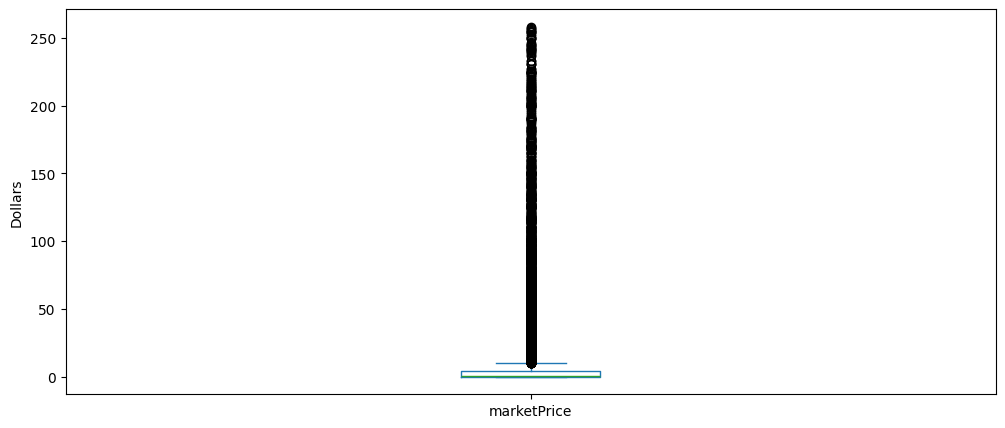

In [ ]:
df_no_outliers['marketPrice'].plot(kind='box', subplots=True, figsize=(12,5), ylabel = "Dollars")
plt.show()

# Download Images

In [ ]:
import os
import requests
from tqdm import tqdm

# Create folder to hold images in the drive
image_dir = "/content/drive/MyDrive/Capstone/pokemon_images_dataset"
os.makedirs(image_dir, exist_ok=True)

# Function for downloading and returning the local image path
def download_image(row):
  file_path = os.path.join(image_dir, f"{row['id']}.jpg")
  if not os.path.exists(file_path):
    try:
      response = requests.get(row['image_url'], timeout=10)
      response.raise_for_status()
      with open(file_path, 'wb') as f:
        f.write(response.content)
    except Exception as e:
      print(f"Error when trying to download image from {row['image_url']}: {e}")
      return None
    return file_path


In [ ]:
# Apply the function and include a progress bar
tqdm.pandas(desc="Downloading Images")
images_df['image_path'] = images_df.progress_apply(download_image, axis=1)

Error when trying to download image from https://images.pokemontcg.io/sm2/16.png: HTTPSConnectionPool(host='images.pokemontcg.io', port=443): Read timed out.


Error when trying to download image from https://images.pokemontcg.io/ecard2/67.png: 404 Client Error: Not Found for url: https://images.pokemontcg.io/ecard2/67.png


Error when trying to download image from https://images.pokemontcg.io/ex5/102.png: 404 Client Error: Not Found for url: https://images.pokemontcg.io/ex5/102.png


Error when trying to download image from https://images.pokemontcg.io/svp/102.png: 404 Client Error: Not Found for url: https://images.pokemontcg.io/svp/102.png


In [ ]:
images_df.head()

,id,name,image_url,image_path
0,hgss4-1,Aggron,https://images.pokemontcg.io/hgss4/1.png,/content/drive/MyDrive/Capstone/pokemon_images...
1,xy5-1,Weedle,https://images.pokemontcg.io/xy5/1.png,/content/drive/MyDrive/Capstone/pokemon_images...
2,pl1-1,Ampharos,https://images.pokemontcg.io/pl1/1.png,/content/drive/MyDrive/Capstone/pokemon_images...
3,dp3-1,Ampharos,https://images.pokemontcg.io/dp3/1.png,/content/drive/MyDrive/Capstone/pokemon_images...
4,det1-1,Bulbasaur,https://images.pokemontcg.io/det1/1.png,/content/drive/MyDrive/Capstone/pokemon_images...


In [ ]:
# Card pull up code
images_df.loc[images_df['id'] == 'ecard2-67']

,id,name,image_url,image_path
8923,ecard2-67,Aipom,https://images.pokemontcg.io/ecard2/67.png,None


In [ ]:
# Save dataframes
df.to_csv('pokemon_data.csv', index=False)
images_df.to_csv('pokemon_images.csv', index=False)